<a href="https://colab.research.google.com/github/soaibsafi/InsulatorSSD/blob/colab/May-2_Itr-1_TF2_MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iteration 1

In [ ]:
ITERATION = '1'

## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Build the Tenforflow API

In [ ]:
import os
import glob
import xml.etree.ElementTree as ET
import pandas as pd
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
# clone the tensorflow models on the colab cloud vm
!git clone --q https://github.com/tensorflow/models.git

#navigate to /models/research folder to compile protos
%cd models/research

# Compile protos.
!protoc object_detection/protos/*.proto --python_out=.

# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

/content/models/research
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.2 MB 8.5 MB/s 
     |████████████████████████████████| 352 kB 47.1 MB/s 
     |████████████████████████████████| 2.2 MB 28.8 MB/s 
     |████████████████████████████████| 23.4 MB 1.6 MB/s 
     |████████████████████████████████| 237 kB 46.8 MB/s 
     |████████████████████████████████| 636 kB 42.0 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 47.8 MB 1.4 MB/s 
     |████████████████████████████████| 90 kB 9.5 MB/s 
     |███████████████████

In [ ]:
%cd /content


/content
/content


In [ ]:

!pip install cython
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
!cp -r pycocotools /content/models/research

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 14.46 MiB/s, done.
Resolving deltas: 100% (576/576), done.
/content/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-dIfpci/python3.7-3.7.13=. -fstack-prote

In [ ]:
%cd /content/models/research
# testing the model builder
!python object_detection/builders/model_builder_tf2_test.py

/content/models/research
Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-04-21 13:11:11.859800: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0421 13:11:12.725737 140219775924096 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 5.1s
I0421 13:11:13.713345 140219775924096 test_util.py:2374] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 5.1s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 2.06s
I0421 13:11:15.7707

In [ ]:
%cd /content
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

/content
--2022-04-21 13:11:55--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.126.128, 2607:f8b0:4001:c54::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.126.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.07s   

2022-04-21 13:11:55 (281 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]



In [ ]:
!tar -xzvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


## Data Preprocessing

In [ ]:
# Copy the augmented images from the google drive and extract it in the colab
%cd /content
!cp -r "/content/gdrive/MyDrive/AugmentedImages.zip" "/content"
!mkdir data
!unzip ./AugmentedImages.zip -d /content/data

In [ ]:
# Clone the github code https://github.com/soaibsafi/InsulatorSSD.git

%cd /content
!git clone https://github.com/soaibsafi/InsulatorSSD.git
%cd InsulatorSSD
!git checkout colab

/content
Cloning into 'InsulatorSSD'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 147 (delta 79), reused 107 (delta 44), pack-reused 0
Receiving objects: 100% (147/147), 35.15 KiB | 3.91 MiB/s, done.
Resolving deltas: 100% (79/79), done.
/content/InsulatorSSD
Already on 'colab'
Your branch is up to date with 'origin/colab'.


[1433 3596  117  344]


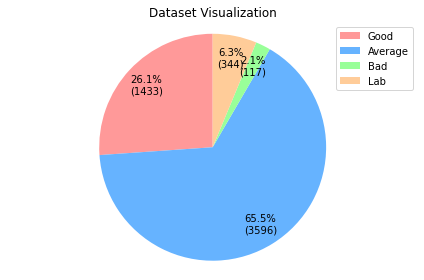

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualite the total dataset
%run /content/InsulatorSSD/helpers/visualize_dataset.py

In [ ]:
# Split the dataset with active learning strategy 
# -dir=<path of the image directory>
# -I=<iteration_number>
%cd /content/
!python /content/InsulatorSSD/helpers/active_learning.py -dir=/content/data/  -I=3

/content
-------------------------
Total Images:  6772
Selected for Training:  270
-------------------------
Good Confidence:  121
Average Confidence:  81
Bad Confidence:  40
Lab Confidence:  27
-------------------------
Training:  188
Validation:  54
Testing:  27
-------------------------
Split Successful. Current details-
Training:  1085
Validation:  310
Testing:  156
-------------------------


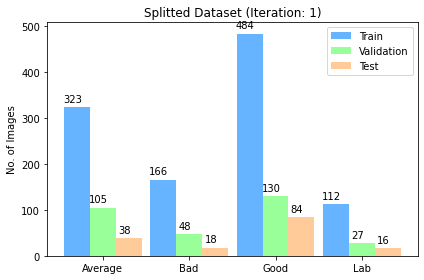

In [ ]:
# Visualize the splitted dataset
# -I=<iteration_number>
%run /content/InsulatorSSD/helpers/visualize_training_set.py -I=1

In [ ]:
# Generate the train/validation/test labels which would be used to generate the tf record
!python /content/InsulatorSSD/helpers/xml_to_csv.py -i /content/data/train -o /content/data/record/train_labels.csv -l /content/data/record/
!python /content/InsulatorSSD/helpers/xml_to_csv.py -i /content/data/validation -o /content/data/record/validation_labels.csv -l /content/data/record/
!python /content/InsulatorSSD/helpers/xml_to_csv.py -i /content/data/test -o /content/data/record/test_labels.csv -l /content/data/record/

Successfully converted xml to csv.
Generate `/content/data/record/label_map.pbtxt`
Successfully converted xml to csv.
Generate `/content/data/record/label_map.pbtxt`
Successfully converted xml to csv.
Generate `/content/data/record/label_map.pbtxt`


In [ ]:
# Generate the tf record
!python /content/InsulatorSSD/helpers/generate_tfrecord.py /content/data/record/train_labels.csv /content/data/record/label_map.pbtxt /content/data/train /content/data/record/train.tfrecord
!python /content/InsulatorSSD/helpers/generate_tfrecord.py /content/data/record/validation_labels.csv /content/data/record/label_map.pbtxt /content/data/validation /content/data/record/validation.tfrecord
!python /content/InsulatorSSD/helpers/generate_tfrecord.py /content/data/record/test_labels.csv /content/data/record/label_map.pbtxt /content/data/test /content/data/record/test.tfrecord


groups: 100% 708/708 [00:00<00:00, 798.13it/s]
Successfully created the TFRecords: /content/data/record/train.tfrecord
groups: 100% 202/202 [00:00<00:00, 581.95it/s]
Successfully created the TFRecords: /content/data/record/validation.tfrecord
groups: 100% 102/102 [00:00<00:00, 946.47it/s]
Successfully created the TFRecords: /content/data/record/test.tfrecord


In [ ]:
#copy the configeration file
!cp /content/InsulatorSSD/config/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config /content/data/record/

In [ ]:
# Create the directory for saving the training data
import time
import os
colab_dir = "/content/data"
training_dir = time.strftime("/content/gdrive/MyDrive/Soaibuzzaman/Thesis_Implimentation/Train_"+"%d-%m-%Y"+"-Iteration-"+ITERATION, time.localtime())
os.makedirs(training_dir)

FileExistsError: ignored

In [ ]:
# copy the data directory to the google drive
!cp -av $colab_dir $training_dir

## Train the model

In [ ]:
#load tensorboard
%load_ext tensorboard  
#%reload_ext tensorboard       
%tensorboard --logdir '/content/gdrive/MyDrive/trained' --host localhost

In [ ]:
!pip install "opencv-python-headless<4.3"

In [ ]:
%cd /content/models/research/object_detection
!python model_main_tf2.py --pipeline_config_path=/content/data/record/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config \
       --model_dir=/content/gdrive/MyDrive/trained \
       --checkpoint_every_n=100 \
       --alsologtostderr

In [ ]:
model_dir="/content/gdrive/MyDrive/trained"
!cp -av $model_dir $training_dir

## Inference

#### Export inference graph

In [ ]:
!python exporter_main_v2.py \
      --trained_checkpoint_dir=/content/gdrive/MyDrive/trained \
      --pipeline_config_path=/content/data/record/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config \
      --output_directory /content/inference

In [ ]:
!cp -av /content/inference $training_dir

In [ ]:
!python /content/models/research/object_detection/inference/infer_detections.py \
    --input_tfrecord_paths=/content/data/record/test.tfrecord \
    --output_tfrecord_path=/content/data/record/inference.tfrecord \
    --inference_graph=/content/inference/saved_model/saved_model.pb

## Saving in GDrive

In [ ]:
%cd $training_dir
!zip -r training.zip $training_dir

In [ ]:
!rm -rf /content/gdrive/MyDrive/trained

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Colab Inference With Test Images

In [ ]:
# Different font-type for labels text.(This step is optional)
!wget https://freefontsdownload.net/download/160187/arial.zip
!unzip arial.zip -d .

%cd utils/
!sed -i "s/font = ImageFont.truetype('arial.ttf', 24)/font = ImageFont.truetype('arial.ttf', 50)/" visualization_utils.py
%cd ..

In [ ]:
#Loading the saved_model
import tensorflow as tf
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from google.colab.patches import cv2_imshow
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

IMAGE_SIZE = (12, 8) # Output display size as you want
import matplotlib.pyplot as plt
PATH_TO_SAVED_MODEL="/content/inference/saved_model"
print('Loading model...', end='')

# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)
print('Done!')

#Loading the label_map
category_index=label_map_util.create_category_index_from_labelmap("/content/data/record/label_map.pbtxt",use_display_name=True)
#category_index=label_map_util.create_category_index_from_labelmap([path_to_label_map],use_display_name=True)

def load_image_into_numpy_array(path):

    return np.array(Image.open(path))

image_path = "/content/data/test/A_0539_jpg.rf.b65d60aef1f3473186d16df9882a4428.jpg"
#print('Running inference for {}... '.format(image_path), end='')

image_np = load_image_into_numpy_array(image_path)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image_np)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.4, # Adjust this value to set the minimum probability boxes to be classified as True
      agnostic_mode=False)
%matplotlib inline
plt.figure(figsize=IMAGE_SIZE, dpi=200)
plt.axis("off")
plt.imshow(image_np_with_detections)
plt.show()

## Experimental

#### Export TF-Lite 

In [ ]:
!python /content/models/research/object_detection/export_tflite_graph_tf2.py \
    --pipeline_config_path /content/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config \
    --trained_checkpoint_dir /content/gdrive/MyDrive/trained \
    --output_directory /content/gdrive/MyDrive/inference_tflite

In [ ]:
tf.compat.v1.disable_eager_execution()

In [ ]:
!python export_inference_graph.py \
    --input_type image_tensor \
    --pipeline_config_path /content/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config \
    --trained_checkpoint_prefix /content/gdrive/MyDrive/trained \
    --output_directory /content/inference2